In [1]:
from PIL import Image
from bird_utils.datasets import get_basic_transform, get_datasets
from bird_utils.models import get_vgg_19, get_vgg_16, get_vgg_13, get_vgg_11, get_frozen_model
from bird_utils.train_vgg import train
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD

import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TRAIN_ROOT_DIR = "/home/dubcar/bird_classifier/birds23sp/birds/train"

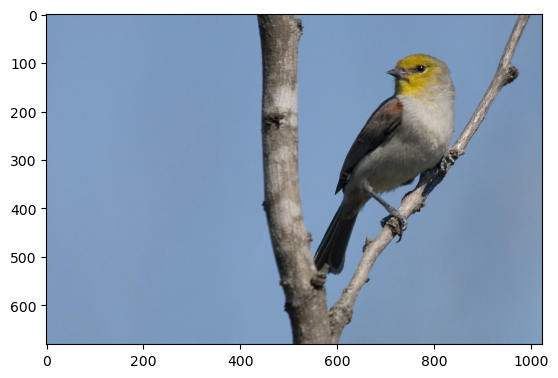

In [3]:
img = Image.open('/home/dubcar/bird_classifier/birds23sp/birds/train/10/08c50ad5c5e7413db49867499d0b54b5.jpg')
plt.imshow(img)

In [4]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)  # this should print out CUDA

cuda


In [5]:
transform = get_basic_transform()

train_set, val_set, num_classes = get_datasets(
    TRAIN_ROOT_DIR,
    transform
)

In [6]:
train_set, val_set, num_classes = get_datasets(
    TRAIN_ROOT_DIR,
    get_basic_transform()
)

In [7]:
BATCH_SIZE = 64

train_loader = DataLoader(train_set, shuffle = True, batch_size = BATCH_SIZE)
val_loader = DataLoader(val_set, shuffle = True, batch_size = BATCH_SIZE)

In [8]:
models_to_train = [
    ('vgg19', get_vgg_19),
    ('vgg11', get_vgg_11),
#   ('vgg16', get_vgg_16(num_classes = num_classes)),
#   ('vgg13', get_vgg_13(num_classes = num_classes))
]

In [9]:
train_results = dict()

In [10]:
PARAMS_PATH_PREFIX = "/home/dubcar/bird_classifier/model_parameters/"

for curr_model_name, curr_model_fun in models_to_train:
    curr_model = curr_model_fun(num_classes = num_classes)
    curr_model.to(DEVICE)

    curr_optimizer = SGD(
        curr_model.classifier.parameters(),
        lr = 0.001,
        momentum = 0.9
    )

    train_results[curr_model_name] = train(
        curr_model,
        curr_optimizer,
        train_loader,
        val_loader,
        PARAMS_PATH_PREFIX + curr_model_name,
        num_epochs = 10
    )

Epoch 1 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:43<00:00,  1.04it/s]


  train_loss: 6.360002517700195
  train accuracy: 0.05267100789488849
  validating...


100%|██████████| 61/61 [00:55<00:00,  1.09it/s]


  val loss: 4.657515525817871
  val accuracy: 0.10866182572614108
  val loss: 4.657515525817871
  val accuracy: 0.10866182572614108
  new val loss record, saving new best model!
  saving current model!

Epoch 2 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:42<00:00,  1.04it/s]


  train_loss: 4.254861354827881
  train accuracy: 0.14934017172823144
  validating...


100%|██████████| 61/61 [00:58<00:00,  1.05it/s]


  val loss: 4.101151943206787
  val accuracy: 0.16727178423236513
  val loss: 4.101151943206787
  val accuracy: 0.16727178423236513
  new val loss record, saving new best model!
  saving current model!

Epoch 3 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:52<00:00,  1.02it/s]


  train_loss: 3.8124969005584717
  train accuracy: 0.19918746038149024
  validating...


100%|██████████| 61/61 [00:55<00:00,  1.10it/s]


  val loss: 3.8839542865753174
  val accuracy: 0.19190871369294607
  val loss: 3.8839542865753174
  val accuracy: 0.19190871369294607
  new val loss record, saving new best model!
  saving current model!

Epoch 4 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:41<00:00,  1.04it/s]


  train_loss: 3.5853662490844727
  train accuracy: 0.22869244511035555
  validating...


100%|██████████| 61/61 [00:55<00:00,  1.09it/s]


  val loss: 3.6769537925720215
  val accuracy: 0.21628630705394192
  val loss: 3.6769537925720215
  val accuracy: 0.21628630705394192
  new val loss record, saving new best model!
  saving current model!

Epoch 5 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:42<00:00,  1.04it/s]


  train_loss: 3.4350838661193848
  train accuracy: 0.2561804875237711
  validating...


100%|██████████| 61/61 [00:55<00:00,  1.09it/s]


  val loss: 3.6124110221862793
  val accuracy: 0.22717842323651452
  val loss: 3.6124110221862793
  val accuracy: 0.22717842323651452
  new val loss record, saving new best model!
  saving current model!

Epoch 6 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:43<00:00,  1.04it/s]


  train_loss: 3.3073201179504395
  train accuracy: 0.2756007606753875
  validating...


100%|██████████| 61/61 [00:56<00:00,  1.09it/s]


  val loss: 3.5261220932006836
  val accuracy: 0.24844398340248963
  val loss: 3.5261220932006836
  val accuracy: 0.24844398340248963
  new val loss record, saving new best model!
  saving current model!

Epoch 7 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:41<00:00,  1.04it/s]


  train_loss: 3.223801851272583
  train accuracy: 0.28937359534374457
  validating...


100%|██████████| 61/61 [00:56<00:00,  1.08it/s]


  val loss: 3.4432785511016846
  val accuracy: 0.2528526970954357
  val loss: 3.4432785511016846
  val accuracy: 0.2528526970954357
  new val loss record, saving new best model!
  saving current model!

Epoch 8 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:40<00:00,  1.04it/s]


  train_loss: 3.14485239982605
  train accuracy: 0.30378032616838585
  validating...


100%|██████████| 61/61 [00:55<00:00,  1.10it/s]


  val loss: 3.380385637283325
  val accuracy: 0.2590767634854772
  val loss: 3.380385637283325
  val accuracy: 0.2590767634854772
  new val loss record, saving new best model!
  saving current model!

Epoch 9 of 10:
  interval: 1
  training...


100%|██████████| 543/543 [08:54<00:00,  1.02it/s]


  train_loss: 3.0861239433288574
  train accuracy: 0.31127182619719934
  validating...


100%|██████████| 61/61 [00:57<00:00,  1.06it/s]


  val loss: 3.386457920074463
  val accuracy: 0.2653008298755187
  val loss: 3.386457920074463
  val accuracy: 0.2653008298755187
  saving current model!

Epoch 10 of 10:
  interval: 2
  training...


100%|██████████| 543/543 [08:54<00:00,  1.02it/s]


  train_loss: 3.02288818359375
  train accuracy: 0.3258514377917363
  validating...


100%|██████████| 61/61 [00:59<00:00,  1.03it/s]


  val loss: 3.3767926692962646
  val accuracy: 0.2767116182572614
  val loss: 3.3767926692962646
  val accuracy: 0.2767116182572614
  new val loss record, saving new best model!
  saving current model!



In [11]:
train_results

{'vgg11': {'model': VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): ReLU(inplace=True)
      (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (14): ReLU(inplace=True)
      (15): MaxPool2d(kernel_size=

In [14]:
train_losses_19 = np.array([loss.item() for loss in train_results['vgg11']['train_losses']])
val_losses_19 = np.array([loss.item() for loss in train_results['vgg11']['val_losses']])
train_acc_19 = np.array([loss for loss in train_results['vgg11']['train_accuracies']])
val_acc_19 = np.array([loss for loss in train_results['vgg11']['val_accuracies']])

In [15]:
epoch_axis = np.arange(1, len(train_losses_19) + 1)

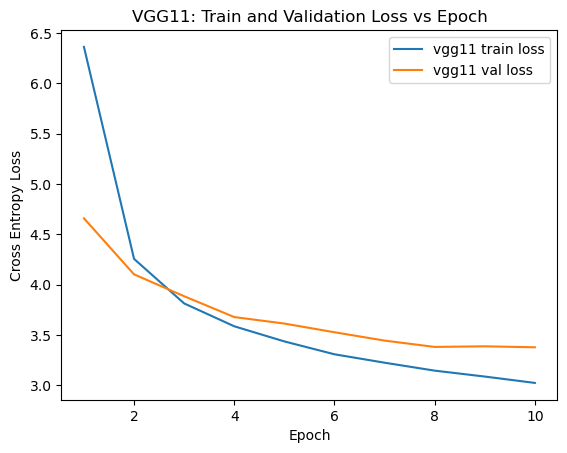

In [16]:
plt.plot(epoch_axis, train_losses_19, label = "vgg11 train loss")
plt.plot(epoch_axis, val_losses_19, label = "vgg11 val loss")

plt.title("VGG11: Train and Validation Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()

plt.show()